In [2]:
import numpy as np
import ugradio
%matplotlib inline
import matplotlib.pyplot as plt

sample = ugradio.pico.capture_data('100mV',divisor = 15,dual_mode=True, nsamples = 5000)
np.savetxt('data_2.6.2',sample)

sample = ugradio.pico.capture_data('100mV',divisor = 15,dual_mode=True, nsamples = 5000)
np.savetxt('data_2.6.2(1)',sample)

sample = ugradio.pico.capture_data('100mV',divisor = 15,dual_mode=True, nsamples = 5000)
np.savetxt('data_2.6.2(2)',sample)

sample = ugradio.pico.capture_data('100mV',divisor = 15,dual_mode=True, nsamples = 5000)
np.savetxt('data_2.6.2(3)',sample)

sample = ugradio.pico.capture_data('100mV',divisor = 15,dual_mode=True, nsamples = 5000)
np.savetxt('data_2.6.2(4)',sample)

[ 2560 -2560 -4608 ..., -5632 -4864 -4864]
10000


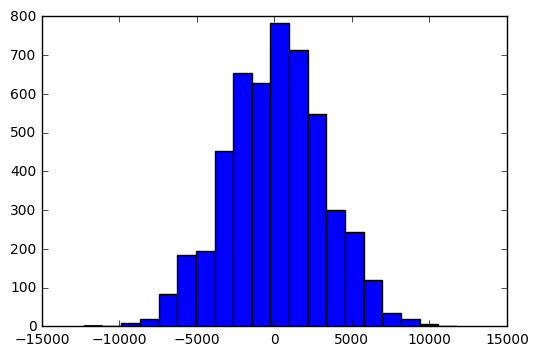

In [8]:
print sample
print(len(sample))
pltReal,RealBin,patches = plt.hist(sample[:4999], bins = 20)
plt.show()

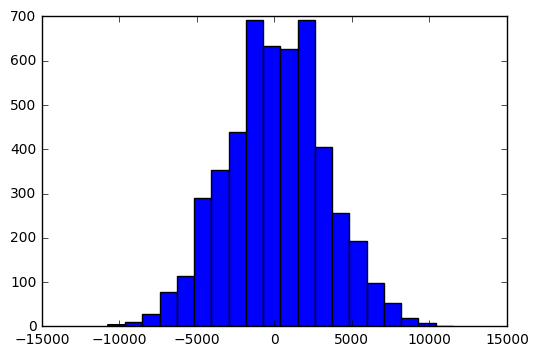

In [9]:
pltImag,ImagBin,patches = plt.hist(sample[5000:9999], bins = 20)
plt.show()

##Power Spectrum

In [28]:
def pwerSpec(filename):
    
    Vsamp = 62.5/5 #MHz
    
    testFile = np.loadtxt(filename)
    
    N = 512

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    #Fourier voltage spectrum - have real and imaginary parts
    # frequency domain signal
    '''The output is a function of frequency, so you have to specify 
    the frequencies for which you want the output. Suggested: make the 
    frequency increment equal to Vsamp/N over a total range of just under
    Vsamp. Thus, you calculate a voltage spectrum running from -Vsamp/2 to
    not quite Vsamp/2.'''
    
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N)
    
    f,fx = ugradio.dft.dft(testFile[:N],t=time, f = f_input, vsamp=Vsamp)
    
    # Fourier power spectrum
    '''Power is proportional to voltage squared.
    We want the sum of the squares of the real and imaginary parts.'''
    
    Pow = np.abs(fx)**2
    
    #plt.plot(f,Pow)
    #plt.title("Power Spectrum")
    #plt.xlabel("Frequency [MHz]")
    #plt.ylabel("Power[V^2]")
    #plt.legend()
    #plt.show()
    
    return Pow, f

    

In [30]:
type(pwerSpec('data_2.6.2'))
len(pwerSpec('data_2.6.2'))

#pwerSpec('data_2.6.2')[0]


2

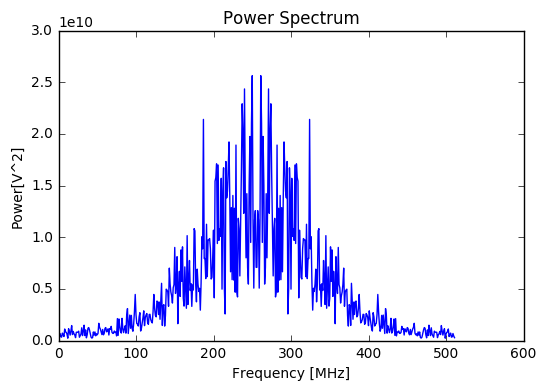

In [43]:
PowSpectra0 = pwerSpec('data_2.6.2')[0]
PowSpectra1 = pwerSpec('data_2.6.2(1)')[0]
PowSpectra2 = pwerSpec('data_2.6.2(2)')[0]
PowSpectra3 = pwerSpec('data_2.6.2(3)')[0]
PowSpectra4 = pwerSpec('data_2.6.2(4)')[0]

#print PowSpectra0[0]
avePow = []
for i in range (0,512):
    avePow.append(0.2*(PowSpectra0[i]+PowSpectra1[i]+PowSpectra2[i]+PowSpectra3[i]+PowSpectra4[i]))
    

#print avePow
plt.plot(avePow)
plt.title("Power Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.legend()
plt.show()    
